Import des librairies de fastai, pandas et sklearn

In [5]:
from fastai import *
from fastai.text.all import *
import pandas as pd
from sklearn.model_selection import train_test_split

Chargement du dataset crée à partir de deux dataset de Kaggle

In [6]:
df = pd.read_csv("data/synopsis.csv")

Split du dataset en deux, une partie training et une autre pour valider. Plus création du data loader

In [7]:
train_df, valid_df = train_test_split(df, test_size=0.25, random_state=98)
data = TextDataLoaders.from_df(train_df, valid_df=valid_df, text_col='synopsis', label_col='label', bs=32)

Entrainement de notre model

In [8]:
learn = text_classifier_learner(data, AWD_LSTM, drop_mult=0.5, metrics=error_rate)
learn.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.430638,0.321532,0.142703,10:23
1,0.411318,0.349647,0.140811,06:26
2,0.360563,0.305415,0.125946,06:21
3,0.362703,0.277373,0.109459,06:27


Evaluation du model

In [9]:
print(learn.validate())

[0.2773725092411041, 0.10945945978164673]


Affichage de la matrice de confusion pour voir ou le model a fait une possible erreur de choix

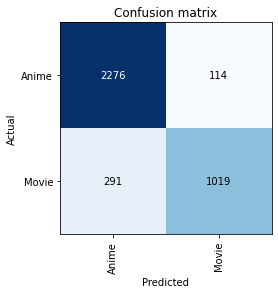

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Export de notre model sous forme de pkl pour être utiliser dans notre app.py

In [11]:
learn.export(fname='model.pkl', pickle_module=pickle)

In [12]:
labels = learn.dls.vocab
def predict(text):
    text
    pred,pred_idx,probs = learn.predict(text)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

Test du model

In [13]:
learn.predict("After the betrayal of his companions, Haruyoshi, the strongest diviner, was on the verge of dying. Hoping to be happy in the next life, he attempted the secret reincarnation technique and was sent to a different world! Born into a family of magicians, the magic he didn't inherit paled in comparison to his previous abilities as an onmyouji. 'Who needs magic? I'll survive in this world with my old techniques!'")

('Anime', tensor(0), tensor([0.7378, 0.2622]))